In [83]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
import itertools

In [84]:
dataset = pd.read_csv('Dataset.csv') 
dataset.head()

,Unnamed: 0,Path,CBO,CC,DIT,LCOM,LOC,NOC,RFC,WMC,class_frequency,will_change,number_of_changes,change_probability
0,0,0,0,2,0,0.0,210,0,0,1,8,0,4,1
1,1,1,0,2,0,0.0,2,0,0,1,8,0,0,0
2,2,2,21,9,0,0.0,33,0,18,4,8,0,2,1
3,3,3,1,7,2,0.0,11,0,2,2,6,0,0,0
4,4,4,1,2,0,0.0,3,0,1,1,8,0,0,0


In [85]:
pd.DataFrame(dataset.isnull().any())

,0
Unnamed: 0,False
Path,False
CBO,False
CC,False
DIT,False
LCOM,False
LOC,False
NOC,False
RFC,False
WMC,False


In [86]:
pd.DataFrame(dataset.isnull().sum())

,0
Unnamed: 0,0
Path,0
CBO,0
CC,0
DIT,0
LCOM,0
LOC,0
NOC,0
RFC,0
WMC,0


In [87]:
dataset.shape

(4183, 14)

In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4183 entries, 0 to 4182
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          4183 non-null   int64  
 1   Path                4183 non-null   int64  
 2   CBO                 4183 non-null   int64  
 3   CC                  4183 non-null   int64  
 4   DIT                 4183 non-null   int64  
 5   LCOM                4183 non-null   float64
 6   LOC                 4183 non-null   int64  
 7   NOC                 4183 non-null   int64  
 8   RFC                 4183 non-null   int64  
 9   WMC                 4183 non-null   int64  
 10  class_frequency     4183 non-null   int64  
 11  will_change         4183 non-null   int64  
 12  number_of_changes   4183 non-null   int64  
 13  change_probability  4183 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 457.6 KB


In [89]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,4183.0,5059.291418,4241.117433,0.0,1031.5,4032.0,10290.50,11574.0
Path,4183.0,5059.291418,4241.117433,0.0,1031.5,4032.0,10290.50,11574.0
CBO,4183.0,7.107339,12.305850,0.0,0.0,3.0,9.00,162.0
CC,4183.0,15.859431,30.251652,0.0,3.0,8.0,15.00,488.0
DIT,4183.0,0.785082,1.764994,0.0,0.0,0.0,0.00,7.0
LCOM,4183.0,2.100433,5.302974,0.0,0.0,0.0,0.71,19.0
LOC,4183.0,36.784843,91.202803,0.0,6.0,12.0,30.00,1369.0
NOC,4183.0,0.612718,6.545734,0.0,0.0,0.0,0.00,189.0
RFC,4183.0,9.936409,25.633500,0.0,0.0,1.0,8.50,413.0
WMC,4183.0,1.558212,4.244770,0.0,0.0,0.0,2.00,56.0


In [90]:
dataset.will_change.unique()

array([0, 1], dtype=int64)

In [93]:
dataset.change_probability.unique()

array([1, 0], dtype=int64)

In [94]:
dataset_upd=pd.DataFrame(dataset, columns = ["Path", "CBO", 
                                   "CC", "DIT",
                                   "LCOM", "LOC", 
                                   "NOC", "RFC", 
                                   "WMC", "class_frequency", "will_change","number_of_changes","change_probability"])
dataset_upd.head()

,Path,CBO,CC,DIT,LCOM,LOC,NOC,RFC,WMC,class_frequency,will_change,number_of_changes,change_probability
0,0,0,2,0,0.0,210,0,0,1,8,0,4,1
1,1,0,2,0,0.0,2,0,0,1,8,0,0,0
2,2,21,9,0,0.0,33,0,18,4,8,0,2,1
3,3,1,7,2,0.0,11,0,2,2,6,0,0,0
4,4,1,2,0,0.0,3,0,1,1,8,0,0,0


In [95]:
dataset_upd.describe().T

,count,mean,std,min,25%,50%,75%,max
Path,4183.0,5059.291418,4241.117433,0.0,1031.5,4032.0,10290.50,11574.0
CBO,4183.0,7.107339,12.305850,0.0,0.0,3.0,9.00,162.0
CC,4183.0,15.859431,30.251652,0.0,3.0,8.0,15.00,488.0
DIT,4183.0,0.785082,1.764994,0.0,0.0,0.0,0.00,7.0
LCOM,4183.0,2.100433,5.302974,0.0,0.0,0.0,0.71,19.0
LOC,4183.0,36.784843,91.202803,0.0,6.0,12.0,30.00,1369.0
NOC,4183.0,0.612718,6.545734,0.0,0.0,0.0,0.00,189.0
RFC,4183.0,9.936409,25.633500,0.0,0.0,1.0,8.50,413.0
WMC,4183.0,1.558212,4.244770,0.0,0.0,0.0,2.00,56.0
class_frequency,4183.0,3.908917,1.982244,1.0,2.0,4.0,6.00,8.0


In [96]:
dataset_upd.shape

(4183, 13)

In [97]:
corr=dataset_upd.corr()
corr

,Path,CBO,CC,DIT,LCOM,LOC,NOC,RFC,WMC,class_frequency,will_change,number_of_changes,change_probability
Path,1.000000,-0.101335,0.046646,-0.048984,0.103780,0.032157,0.028719,-0.052101,0.061468,-0.947304,0.043557,-0.162685,-0.180376
CBO,-0.101335,1.000000,0.664154,0.480222,-0.002464,0.620662,-0.021567,0.885436,0.530680,0.072598,0.250884,0.352016,0.323919
CC,0.046646,0.664154,1.000000,0.237694,0.037546,0.751674,0.038034,0.716956,0.681935,-0.057228,0.236204,0.302090,0.273142
DIT,-0.048984,0.480222,0.237694,1.000000,-0.018140,0.286988,0.036341,0.346399,0.236019,0.052635,0.096447,0.143643,0.140738
LCOM,0.103780,-0.002464,0.037546,-0.018140,1.000000,0.022093,-0.024173,0.023693,0.091010,-0.127995,-0.012518,0.009627,-0.013616
LOC,0.032157,0.620662,0.751674,0.286988,0.022093,1.000000,0.035754,0.686624,0.624606,-0.048812,0.253040,0.312665,0.278207
NOC,0.028719,-0.021567,0.038034,0.036341,-0.024173,0.035754,1.000000,-0.021863,0.122054,-0.019010,0.024863,-0.005293,0.001041
RFC,-0.052101,0.885436,0.716956,0.346399,0.023693,0.686624,-0.021863,1.000000,0.590402,0.031200,0.229587,0.365931,0.315154
WMC,0.061468,0.530680,0.681935,0.236019,0.091010,0.624606,0.122054,0.590402,1.000000,-0.053266,0.185629,0.299648,0.222402
class_frequency,-0.947304,0.072598,-0.057228,0.052635,-0.127995,-0.048812,-0.019010,0.031200,-0.053266,1.000000,-0.095760,0.200326,0.208452


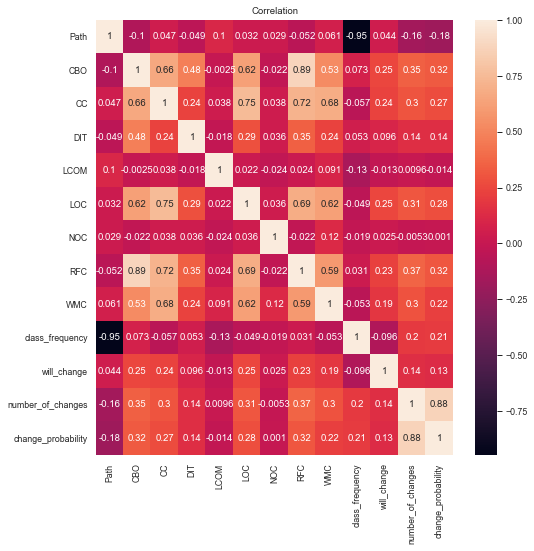

In [98]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True)
plt.title("Correlation")
plt.show()

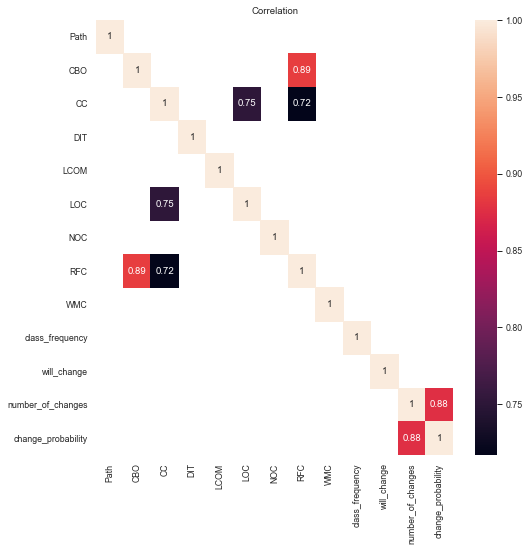

In [99]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
sns.set_context("paper")
sns.heatmap(corr[corr>.70], annot=True)
plt.title("Correlation")
plt.show()

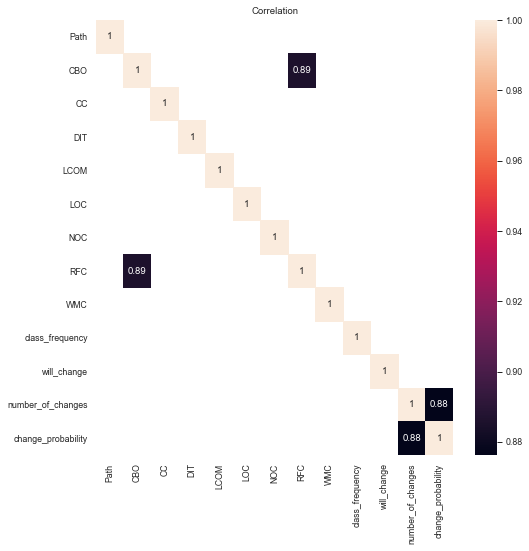

In [100]:
plt.figure(figsize=(8,8))
sns.set_style("whitegrid")
sns.set_context("paper")
sns.heatmap(corr[corr>.80], annot=True)
plt.title("Correlation")
plt.show()

In [101]:
drop_columns_1=["RFC"]
drop_columns_2=["RFC","LOC"]

In [102]:
X1=dataset_upd.drop("will_change", axis=1)
X1.head()

,Path,CBO,CC,DIT,LCOM,LOC,NOC,RFC,WMC,class_frequency,number_of_changes,change_probability
0,0,0,2,0,0.0,210,0,0,1,8,4,1
1,1,0,2,0,0.0,2,0,0,1,8,0,0
2,2,21,9,0,0.0,33,0,18,4,8,2,1
3,3,1,7,2,0.0,11,0,2,2,6,0,0
4,4,1,2,0,0.0,3,0,1,1,8,0,0


In [103]:
y1=dataset_upd["will_change"]
y1.head()

0    0
1    0
2    0
3    0
4    0
Name: will_change, dtype: int64

In [104]:
X2=dataset_upd.drop("change_probability", axis=1)
X2.head()

,Path,CBO,CC,DIT,LCOM,LOC,NOC,RFC,WMC,class_frequency,will_change,number_of_changes
0,0,0,2,0,0.0,210,0,0,1,8,0,4
1,1,0,2,0,0.0,2,0,0,1,8,0,0
2,2,21,9,0,0.0,33,0,18,4,8,0,2
3,3,1,7,2,0.0,11,0,2,2,6,0,0
4,4,1,2,0,0.0,3,0,1,1,8,0,0


In [105]:
y2=dataset_upd["change_probability"]
y2.head()

0    1
1    0
2    1
3    0
4    0
Name: change_probability, dtype: int64

Decision Tree

In [106]:
def decision_tree_basic_with_corr_columns(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0) 
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    clf=DecisionTreeClassifier()
    clf=clf.fit(X_train, y_train)
    print("Estimator :\n", clf)
    
    y_pred_train=clf.predict(X_train)
    y_pred_test=clf.predict(X_test)
    
    print("\n")
    print("TRAIN DATA STATISTICS:\n")
    print("Accuracy : ", metrics.accuracy_score(y_train, y_pred_train))
    print("Recall : ", metrics.recall_score(y_train, y_pred_train))
    print("Precision : ", metrics.precision_score(y_train, y_pred_train))
    print("F1 score : ", metrics.f1_score(y_train, y_pred_train))
    print("\n\nConfusion matrix : \n", pd.DataFrame(metrics.confusion_matrix(y_train, y_pred_train), 
                                        columns=['No','Yes'], index=['No','Yes']))
    print("\n\nClassification report : \n", metrics.classification_report(y_train, y_pred_train))
    
    print("\n\n")
    print("TEST DATA STATISTICS:\n")
    print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_test))
    print("Recall : ", metrics.recall_score(y_test, y_pred_test))
    print("Precision : ", metrics.precision_score(y_test, y_pred_test))
    print("F1 score : ", metrics.f1_score(y_test, y_pred_test))
    print("\n\nConfusion matrix : \n", pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_test), 
                                        columns=['Predict No','Predict Yes'], index=['Actual No','Actual Yes']))
    print("\n\nClassification report : \n", metrics.classification_report(y_test, y_pred_test))

In [107]:
def decision_tree_basic_without_corr_columns(X, y, drop_columns):
    X=X.drop(drop_columns, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0) 
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    clf=DecisionTreeClassifier()
    clf=clf.fit(X_train, y_train)
    print("Estimator :\n", clf)
    
    y_pred_train=clf.predict(X_train)
    y_pred_test=clf.predict(X_test)
    
    print("\n")
    print("TRAIN DATA STATISTICS:\n")
    print("Accuracy : ", metrics.accuracy_score(y_train, y_pred_train))
    print("Recall : ", metrics.recall_score(y_train, y_pred_train))
    print("Precision : ", metrics.precision_score(y_train, y_pred_train))
    print("F1 score : ", metrics.f1_score(y_train, y_pred_train))
    print("\n")
    print("\nConfusion matrix : \n", pd.DataFrame(metrics.confusion_matrix(y_train, y_pred_train), 
                                        columns=['No','Yes'], index=['No','Yes']))
    print("\n")
    print("\nClassification report : \n", metrics.classification_report(y_train, y_pred_train))
    
    print("\n\n")
    print("TEST DATA STATISTICS:\n")
    print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_test))
    print("Recall : ", metrics.recall_score(y_test, y_pred_test))
    print("Precision : ", metrics.precision_score(y_test, y_pred_test))
    print("F1 score : ", metrics.f1_score(y_test, y_pred_test))
    print("\n")
    print("\nConfusion matrix : \n", pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_test), 
                                        columns=['Predict No','Predict Yes'], index=['Actual No','Actual Yes']))
    print("\n")
    print("\nClassification report : \n", metrics.classification_report(y_test, y_pred_test))

In [108]:
#will change
decision_tree_basic_with_corr_columns(X1,y1)

(3346, 12)
(837, 12)
(3346,)
(837,)
Estimator :
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


TRAIN DATA STATISTICS:

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
F1 score :  1.0


Confusion matrix : 
        No  Yes
No   3094    0
Yes     0  252


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3094
           1       1.00      1.00      1.00       252

    accuracy                           1.00      3346
   macro avg       1.00      1.00      1.00      3346
weighted avg       1.00      1.00      1.00      3346




TEST DATA STATISTICS:

Accuracy

In [109]:
#will change
decision_tree_basic_without_corr_columns(X1,y1, drop_columns_1)

(3346, 11)
(837, 11)
(3346,)
(837,)
Estimator :
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


TRAIN DATA STATISTICS:

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
F1 score :  1.0



Confusion matrix : 
        No  Yes
No   3094    0
Yes     0  252



Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3094
           1       1.00      1.00      1.00       252

    accuracy                           1.00      3346
   macro avg       1.00      1.00      1.00      3346
weighted avg       1.00      1.00      1.00      3346




TEST DATA STATISTICS:

Accura

In [110]:
#will change
decision_tree_basic_without_corr_columns(X1,y1, drop_columns_2)

(3346, 10)
(837, 10)
(3346,)
(837,)
Estimator :
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


TRAIN DATA STATISTICS:

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
F1 score :  1.0



Confusion matrix : 
        No  Yes
No   3094    0
Yes     0  252



Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3094
           1       1.00      1.00      1.00       252

    accuracy                           1.00      3346
   macro avg       1.00      1.00      1.00      3346
weighted avg       1.00      1.00      1.00      3346




TEST DATA STATISTICS:

Accura

In [111]:
#change probability
decision_tree_basic_with_corr_columns(X2,y2)

(3346, 12)
(837, 12)
(3346,)
(837,)
Estimator :
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


TRAIN DATA STATISTICS:

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
F1 score :  1.0


Confusion matrix : 
        No  Yes
No   3037    0
Yes     0  309


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3037
           1       1.00      1.00      1.00       309

    accuracy                           1.00      3346
   macro avg       1.00      1.00      1.00      3346
weighted avg       1.00      1.00      1.00      3346




TEST DATA STATISTICS:

Accuracy

In [112]:
#change probability
decision_tree_basic_without_corr_columns(X2,y2, drop_columns_1)

(3346, 11)
(837, 11)
(3346,)
(837,)
Estimator :
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


TRAIN DATA STATISTICS:

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
F1 score :  1.0



Confusion matrix : 
        No  Yes
No   3037    0
Yes     0  309



Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3037
           1       1.00      1.00      1.00       309

    accuracy                           1.00      3346
   macro avg       1.00      1.00      1.00      3346
weighted avg       1.00      1.00      1.00      3346




TEST DATA STATISTICS:

Accura

In [113]:
#change probability
decision_tree_basic_without_corr_columns(X2,y2, drop_columns_2)

(3346, 10)
(837, 10)
(3346,)
(837,)
Estimator :
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


TRAIN DATA STATISTICS:

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
F1 score :  1.0



Confusion matrix : 
        No  Yes
No   3037    0
Yes     0  309



Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3037
           1       1.00      1.00      1.00       309

    accuracy                           1.00      3346
   macro avg       1.00      1.00      1.00      3346
weighted avg       1.00      1.00      1.00      3346




TEST DATA STATISTICS:

Accura

Random Forest Classifier

In [114]:
def random_forest_with_corr_columns(X, y, ref_score):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0) 
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    clf=RandomForestClassifier(random_state=0)
    param_grid={
                  'criterion':['gini','entropy'],
                  'max_depth':range(2,10,2),
                  'min_samples_split':range(2,10, 2),
                  'min_samples_leaf':range(1,10, 1),
                  'max_features':['auto','sqrt','log2']
               }
    
    scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'accuracy_score': metrics.make_scorer(metrics.accuracy_score),
    'f1_score': metrics.make_scorer(metrics.f1_score)
  }
    
    #clf = GridSearchCV(clf, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)
    clf = RandomizedSearchCV(clf, n_iter=10, param_distributions = param_grid, cv =10, 
                             verbose=True, n_jobs=-1, 
                             return_train_score=True, 
                             refit=ref_score, scoring=scorers)
    
    clf=clf.fit(X_train, y_train)
    print("Best estimator : \n", clf.best_estimator_)
    
    y_pred_train=clf.predict(X_train)
    y_pred_test=clf.predict(X_test)
    
    print("\n")
    print("TRAIN DATA STATISTICS:\n")
    print("Accuracy : ", metrics.accuracy_score(y_train, y_pred_train))
    print("Recall : ", metrics.recall_score(y_train, y_pred_train))
    print("Precision : ", metrics.precision_score(y_train, y_pred_train))
    print("F1 score : ", metrics.f1_score(y_train, y_pred_train))
    print("\n\nConfusion matrix : \n", pd.DataFrame(metrics.confusion_matrix(y_train, y_pred_train), 
                                        columns=['No','Yes'], index=['No','Yes']))
    print("\n\nClassification report : \n", metrics.classification_report(y_train, y_pred_train))
    
    print("\n\n")
    print("TEST DATA STATISTICS:\n")
    print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_test))
    print("Recall : ", metrics.recall_score(y_test, y_pred_test))
    print("Precision : ", metrics.precision_score(y_test, y_pred_test))
    print("F1 score : ", metrics.f1_score(y_test, y_pred_test))
    print("\n\nConfusion matrix : \n", pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_test), 
                                        columns=['Predict No','Predict Yes'], index=['Actual No','Actual Yes']))
    print("\n\nClassification report : \n", metrics.classification_report(y_test, y_pred_test))

In [115]:
def random_forest_without_corr_columns(X, y, ref_score, drop_columns):
    X=X.drop(drop_columns, axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0) 
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    clf=RandomForestClassifier(random_state=0)
    param_grid={
                  'criterion':['gini','entropy'],
                  'max_depth':range(2,10,2),
                  'min_samples_split':range(2,10, 2),
                  'min_samples_leaf':range(1,10, 1),
                  'max_features':['auto','sqrt','log2']
               }
    
    scorers = {
    'precision_score': metrics.make_scorer(metrics.precision_score),
    'recall_score': metrics.make_scorer(metrics.recall_score),
    'accuracy_score': metrics.make_scorer(metrics.accuracy_score),
    'f1_score': metrics.make_scorer(metrics.f1_score)
  }
    
    #clf = GridSearchCV(clf, param_grid = param_grid, cv=5, verbose=True, n_jobs=-1)
    clf = RandomizedSearchCV(clf, n_iter=10, param_distributions = param_grid, cv =10, 
                             verbose=True, n_jobs=-1, 
                             return_train_score=True, 
                             refit=ref_score, scoring=scorers)
    
    clf=clf.fit(X_train, y_train)
    print("Best estimator : \n", clf.best_estimator_)
    
    y_pred_train=clf.predict(X_train)
    y_pred_test=clf.predict(X_test)
    
    print("\n")
    print("TRAIN DATA STATISTICS:\n")
    print("Accuracy : ", metrics.accuracy_score(y_train, y_pred_train))
    print("Recall : ", metrics.recall_score(y_train, y_pred_train))
    print("Precision : ", metrics.precision_score(y_train, y_pred_train))
    print("F1 score : ", metrics.f1_score(y_train, y_pred_train))
    print("\n\nConfusion matrix : \n", pd.DataFrame(metrics.confusion_matrix(y_train, y_pred_train), 
                                        columns=['No','Yes'], index=['No','Yes']))
    print("\n\nClassification report : \n", metrics.classification_report(y_train, y_pred_train))
    
    print("\n\n")
    print("TEST DATA STATISTICS:\n")
    print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_test))
    print("Recall : ", metrics.recall_score(y_test, y_pred_test))
    print("Precision : ", metrics.precision_score(y_test, y_pred_test))
    print("F1 score : ", metrics.f1_score(y_test, y_pred_test))
    print("\n\nConfusion matrix : \n", pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_test), 
                                        columns=['Predict No','Predict Yes'], index=['Actual No','Actual Yes']))
    print("\n\nClassification report : \n", metrics.classification_report(y_test, y_pred_test))

In [116]:
def random_forest_basic(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 0) 
    print(X_train.shape)
    print(X_test.shape)
    print(y_train.shape)
    print(y_test.shape)
    
    clf=RandomForestClassifier(n_estimators=50, criterion='entropy', random_state=0)
    
       
    clf=clf.fit(X_train, y_train)
    print("Best estimator : \n", clf)
    
    y_pred_train=clf.predict(X_train)
    y_pred_test=clf.predict(X_test)
    
    print("\n")
    print("TRAIN DATA STATISTICS:\n")
    print("Accuracy : ", metrics.accuracy_score(y_train, y_pred_train))
    print("Recall : ", metrics.recall_score(y_train, y_pred_train))
    print("Precision : ", metrics.precision_score(y_train, y_pred_train))
    print("F1 score : ", metrics.f1_score(y_train, y_pred_train))
    print("\n\nConfusion matrix : \n", pd.DataFrame(metrics.confusion_matrix(y_train, y_pred_train), 
                                        columns=['No','Yes'], index=['No','Yes']))
    print("\n\nClassification report : \n", metrics.classification_report(y_train, y_pred_train))
    
    print("\n\n")
    print("TEST DATA STATISTICS:\n")
    print("Accuracy : ", metrics.accuracy_score(y_test, y_pred_test))
    print("Recall : ", metrics.recall_score(y_test, y_pred_test))
    print("Precision : ", metrics.precision_score(y_test, y_pred_test))
    print("F1 score : ", metrics.f1_score(y_test, y_pred_test))
    print("\n\nConfusion matrix : \n", pd.DataFrame(metrics.confusion_matrix(y_test, y_pred_test), 
                                        columns=['Predict No','Predict Yes'], index=['Actual No','Actual Yes']))
    print("\n\nClassification report : \n", metrics.classification_report(y_test, y_pred_test))

In [117]:
#will change
random_forest_basic(X1,y1)

(3346, 12)
(837, 12)
(3346,)
(837,)
Best estimator : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TRAIN DATA STATISTICS:

Accuracy :  0.9991034070531979
Recall :  0.9880952380952381
Precision :  1.0
F1 score :  0.9940119760479043


Confusion matrix : 
        No  Yes
No   3094    0
Yes     3  249


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3094
           1       1.00      0.99      0.99       252

    accuracy                           1.00      3346
   macr

In [118]:
#change probability
random_forest_basic(X2,y2)

(3346, 12)
(837, 12)
(3346,)
(837,)
Best estimator : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TRAIN DATA STATISTICS:

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
F1 score :  1.0


Confusion matrix : 
        No  Yes
No   3037    0
Yes     0  309


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3037
           1       1.00      1.00      1.00       309

    accuracy                           1.00      3346
   macro avg       1.00      1.00      1.00      334

In [119]:
#will change
random_forest_with_corr_columns(X1,y1, 'precision_score')

(3346, 12)
(837, 12)
(3346,)
(837,)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.1s


Best estimator : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TRAIN DATA STATISTICS:

Accuracy :  0.93335325762104
Recall :  0.12698412698412698
Precision :  0.9142857142857143
F1 score :  0.22299651567944254


Confusion matrix : 
        No  Yes
No   3091    3
Yes   220   32


Classification report : 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97      3094
           1       0.91      0.13      0.22       252

    accuracy                           0.93      3346
   macro avg       0.92      0.

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.7s finished


In [120]:
#will change
random_forest_with_corr_columns(X1,y1, 'accuracy_score')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


(3346, 12)
(837, 12)
(3346,)
(837,)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    4.2s remaining:    0.2s


Best estimator : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TRAIN DATA STATISTICS:

Accuracy :  0.93753735803945
Recall :  0.20238095238095238
Precision :  0.864406779661017
F1 score :  0.3279742765273312


Confusion matrix : 
        No  Yes
No   3086    8
Yes   201   51


Classification report : 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3094
           1       0.86      0.20      0.33       252

    accuracy                           0.94      3346
   macro avg       0.90      0.60   

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.4s finished


In [121]:
#will change
random_forest_with_corr_columns(X1,y1, 'recall_score')

(3346, 12)
(837, 12)
(3346,)
(837,)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    4.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.1s finished


Best estimator : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TRAIN DATA STATISTICS:

Accuracy :  0.9453078302450687
Recall :  0.30952380952380953
Precision :  0.896551724137931
F1 score :  0.46017699115044247


Confusion matrix : 
        No  Yes
No   3085    9
Yes   174   78


Classification report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3094
           1       0.90      0.31      0.46       252

    accuracy                           0.95      3346
   macro avg       0.92      0.65

In [122]:
#will change
random_forest_with_corr_columns(X1,y1, 'f1_score')

(3346, 12)
(837, 12)
(3346,)
(837,)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s


Best estimator : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TRAIN DATA STATISTICS:

Accuracy :  0.9441123729826658
Recall :  0.30158730158730157
Precision :  0.8735632183908046
F1 score :  0.44837758112094395


Confusion matrix : 
        No  Yes
No   3083   11
Yes   176   76


Classification report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      3094
           1       0.87      0.30      0.45       252

    accuracy                           0.94      3346
   macro avg       0.91      0.6

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.7s finished


In [123]:
#change probability
random_forest_with_corr_columns(X2,y2, 'precision_score')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


(3346, 12)
(837, 12)
(3346,)
(837,)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s


Best estimator : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TRAIN DATA STATISTICS:

Accuracy :  0.9991034070531979
Recall :  0.9902912621359223
Precision :  1.0
F1 score :  0.9951219512195122


Confusion matrix : 
        No  Yes
No   3037    0
Yes     3  306


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3037
           1       1.00      0.99      1.00       309

    accuracy                           1.00      3346
   macro avg       1.00      1.00      1.00   

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished


In [124]:
#change probability
random_forest_with_corr_columns(X2,y2, 'accuracy_score')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


(3346, 12)
(837, 12)
(3346,)
(837,)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s


Best estimator : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TRAIN DATA STATISTICS:

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
F1 score :  1.0


Confusion matrix : 
        No  Yes
No   3037    0
Yes     0  309


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3037
           1       1.00      1.00      1.00       309

    accuracy                           1.00      3346
   macro avg       1.00      1.00      1.00      3346
weighted avg       1.00      1.00      1

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished


In [125]:
#change probability
random_forest_with_corr_columns(X2,y2, 'recall_score')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


(3346, 12)
(837, 12)
(3346,)
(837,)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s


Best estimator : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TRAIN DATA STATISTICS:

Accuracy :  0.9997011356843993
Recall :  0.9967637540453075
Precision :  1.0
F1 score :  0.9983792544570502


Confusion matrix : 
        No  Yes
No   3037    0
Yes     1  308


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3037
           1       1.00      1.00      1.00       309

    accuracy                           1.00      3346
   macro avg       1.00      1.00      1.00   

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.5s finished


In [126]:
#change probability
random_forest_with_corr_columns(X2,y2, 'f1_score')

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


(3346, 12)
(837, 12)
(3346,)
(837,)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    3.2s


Best estimator : 
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


TRAIN DATA STATISTICS:

Accuracy :  1.0
Recall :  1.0
Precision :  1.0
F1 score :  1.0


Confusion matrix : 
        No  Yes
No   3037    0
Yes     0  309


Classification report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3037
           1       1.00      1.00      1.00       309

    accuracy                           1.00      3346
   macro avg       1.00      1.00      1.00      3346
weighted avg       1.00      1.00      1

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.2s finished
